# **Linear Regression**
***What is Linear Regression?***
Linear regression is a supervised learning algorithm that predicts a continuous target variable based on one or more independent variables. It assumes a linear relationship between the dependent variable (target) and the independent variables (features). The goal is to fit a linear equation to the observed data.     
**Types of Linear Regression**
1. **Simple Linear Regression**: Involves one independent variable.
2. **Multiple Linear Regression**: Involves more than one independent variable.

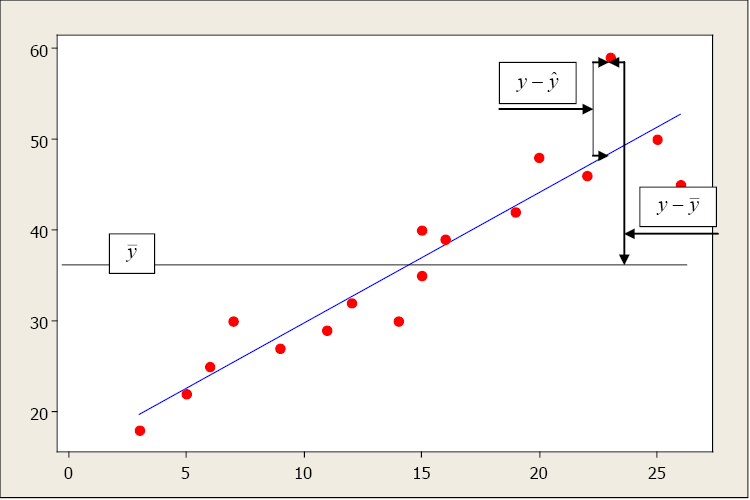


#**Mathematical Equations**

**y=β 0​+β 1​x**
                                     
**y=β 0​+β 1​x 1​+β 2​x 2​+…+β n​x**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
# sample data
X = np.array([[5], [15], [25], [35], [45], [55]])
y = np.array([5, 20, 14, 32, 22, 38])

In [ ]:
# Create a model
model = LinearRegression()

# Train/Fitting the data
model.fit(X, y)

LinearRegression()

In [ ]:
# make predictions
y_pred = model.predict(X)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

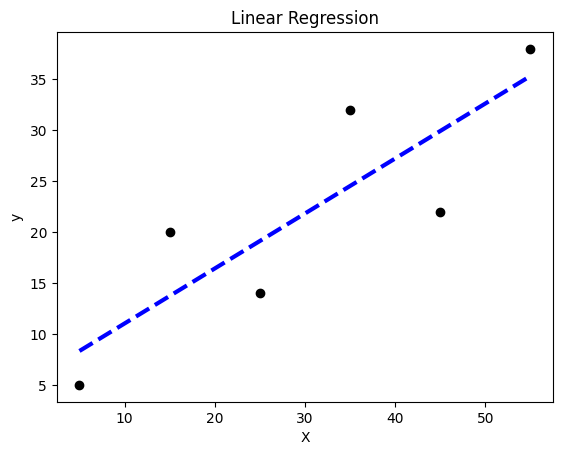

In [ ]:
# plot the results
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3, linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

In [ ]:
# metrics
print('Coefficients/slope: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients/slope:  [0.54]
Intercept:  5.633333333333329


In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y, y_pred))
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', mean_squared_error(y, y_pred))
print('R2 Score: ', r2_score(y, y_pred))

Root Mean Squared Error:  5.809953145728075
Mean Absolute Error:  5.466666666666666
Mean Squared Error:  33.75555555555555
R2 Score:  0.7158756137479542


#**Newyork-Housing-Dataset**
###**About Dataset**
Description:

This dataset contains prices of New York houses, providing valuable insights into the real estate market in the region. It includes information such as broker titles, house types, prices, number of bedrooms and bathrooms, property square footage, addresses, state, administrative and local areas, street names, and geographical coordinates.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [ ]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [ ]:
df.isnull().sum()

,0
BROKERTITLE,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
ADDRESS,0
STATE,0
MAIN_ADDRESS,0
ADMINISTRATIVE_AREA_LEVEL_2,0


In [ ]:
df.shape

(4801, 17)

In [ ]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
# create model
model = LinearRegression()

# train / fitting the data
# Drop non-numeric columns before fitting
X_numeric = X.select_dtypes(include=['number'])
y = y.astype(float)

model.fit(X_numeric, y)

LinearRegression()

In [ ]:
# make predictions
y_pred = model.predict(X_numeric)
y_pred

array([ 2073776.76722217, 27541275.43070459,  5264172.99456549, ...,
        2994536.25333762, -1267206.35141516,   478544.07280827])

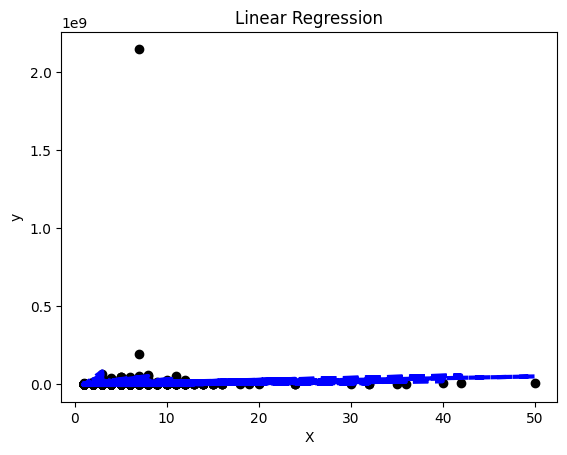

In [ ]:
# plot the result
plt.scatter(X_numeric.iloc[:, 0], y, color='black') # Select the first column of X_numeric for plotting
plt.plot(X_numeric.iloc[:, 0], y_pred, color='blue', linewidth=3, linestyle='--') # Select the first column of X_numeric for plotting

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

In [ ]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Coefficients/slope: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients/slope:  [-3.39298878e+05  8.30198886e+05  1.26460779e+03  1.25553119e+06
 -1.51913518e+07]
Intercept:  -1175627904.724477


In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score: ', r2)

Mean Absolute Error:  2464030.4674717295
Mean Squared Error:  967377192485543.4
Root Mean Squared Error:  31102687.86593119
R2 Score:  0.01583961287023683


In [ ]:
# 2. Impact of Number of Bedrooms on Price: Analyze how the number of bedrooms affects the house price.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame named 'df' with columns 'Number_of_bedrooms' and 'price'

# Check the column names in your DataFrame
print(df.columns)


Index(['BROKERTITLE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'ADDRESS', 'STATE',
       'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       'SUBLOCALITY',
       ...
       'PRICE_44500000', 'PRICE_45000000', 'PRICE_48000000', 'PRICE_50000000',
       'PRICE_55000000', 'PRICE_56000000', 'PRICE_60000000', 'PRICE_65000000',
       'PRICE_195000000', 'PRICE_2147483647'],
      dtype='object', length=1302)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# load dataset
data.head()





,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
# data cleaning
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)




In [ ]:
# Convert 'PRICE' and 'BEDS' to numeric, forcing errors to NaN
data['PRICE'] = pd.to_numeric(data['PRICE'], errors='coerce')
data['BEDS'] = pd.to_numeric(data['BEDS'], errors='coerce')

# Drop rows with missing values in 'PRICE' or 'BEDS'
data = data.dropna(subset=['PRICE', 'BEDS'])

# Display the first few rows of the cleaned dataset
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


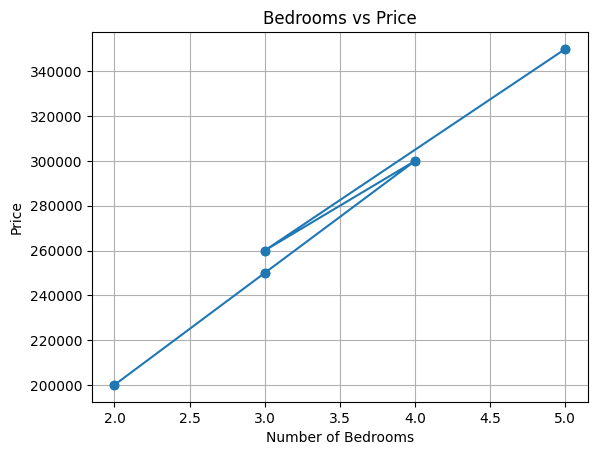

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data, replace this with your actual data loading
data = pd.DataFrame({
    'BEDS': [2, 3, 4, 3, 5],
    'PRICE': [200000, 250000, 300000, 260000, 350000]
})

plt.scatter(data['BEDS'], data['PRICE'])

plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.grid(True)
plt.plot(data['BEDS'], data['PRICE'], marker='o', linestyle='-')

plt.show()

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['BEDS']], data['PRICE'], test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 22045756291708.94
R-squared: -0.0902231585273634


In [ ]:
# Print the coefficient and intercept
print(f"Coefficient (Number of Bedrooms): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient (Number of Bedrooms): 747481.6936080427
Intercept: -3033.7182165309787


In [ ]:
# 3. Price Estimation Based on property Square Footage: Build a model to estimate house prices based on property square footage.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
# show all coloumns
pd.set_option('display.max_columns', None)
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
df.shape

(4801, 17)

In [ ]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [ ]:
df['PROPERTYSQFT'].mean()

2184.207861758384

In [ ]:
df['PROPERTYSQFT'].fillna(df['PROPERTYSQFT'].mean(), inplace=True)

In [ ]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


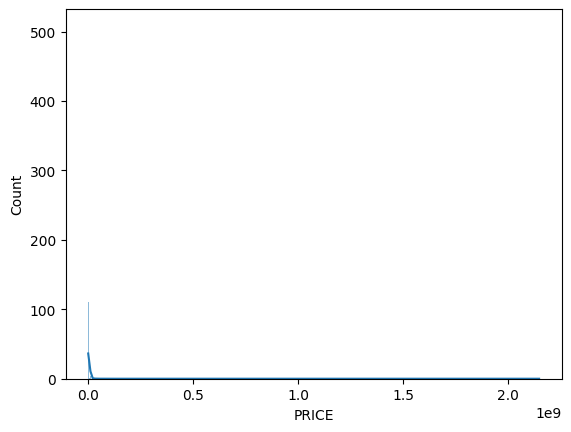

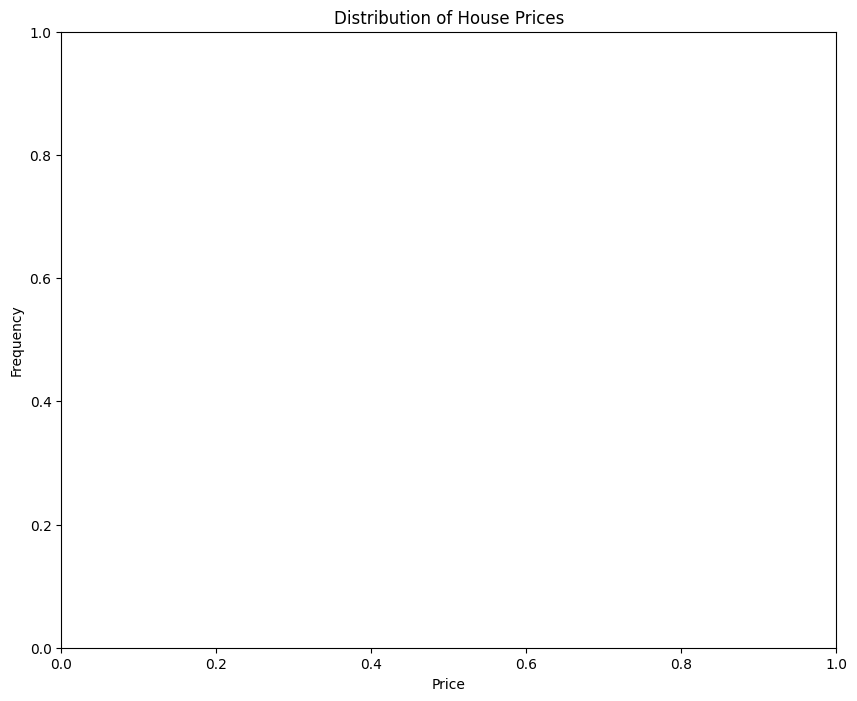

In [ ]:
# visualize the distribution of target variable

sns.histplot(df['PRICE'], kde=True)
plt.figure(figsize=(10, 8))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


In [ ]:
# split the dataset

from sklearn.model_selection import train_test_split

X = df[['PROPERTYSQFT']]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3840, 1)
(961, 1)
(3840,)
(961,)


In [ ]:
# training the model - regression - Simple Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression() #initialization
model.fit(X_train, y_train) #training

LinearRegression()

In [ ]:
# prediction

y_pred = model.predict(X_test)

y_pred

array([ 3.83729148e+06,  1.26549558e+06,  3.68886038e+06,  7.68705792e+05,
        2.81003624e+05,  2.00310724e+06,  1.22763050e+06,  2.45445894e+06,
        4.87933835e+06,  2.45325916e+06,  2.64378431e+06,  1.78651901e+06,
        6.59654375e+05,  2.45325916e+06,  3.38593978e+06,  2.45325916e+06,
        3.62792187e+05,  9.62574976e+05,  3.56733775e+05,  1.73350791e+06,
        2.45325916e+06,  2.41659386e+06,  2.45325916e+06,  1.29764060e+07,
        2.45325916e+06,  2.45325916e+06,  2.45325916e+06,  2.45325916e+06,
        1.76834377e+06,  4.32463925e+05,  6.86952669e+06,  8.56552766e+05,
        2.45325916e+06,  2.45325916e+06,  1.19585928e+07,  2.45325916e+06,
        1.31057927e+05,  5.08194075e+05,  8.67190427e+06,  2.27992519e+05,
        2.29542562e+06,  9.01990856e+05,  2.45325916e+06,  2.45325916e+06,
        6.96004848e+05,  8.41052338e+04,  1.97432978e+06,  3.56733775e+05,
       -9.76471268e+04,  2.47717798e+06,  2.81003624e+05,  3.56733775e+05,
        1.94706693e+06,  

In [ ]:
y_test


596      750000
4507     899000
3049    5900000
2957    1695000
8        265000
         ...   
198      800000
2422     598000
1485     725000
402      790000
2759     279000
Name: PRICE, Length: 961, dtype: int64

In [ ]:
# error

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 20898868162150.402
R-squared: 0.17050980088298184


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# SST
sst = np.sum((y_test - np.mean(y_test))**2)
print("SST = ", sst)

# SSR
ssr = np.sum((y_pred - np.mean(y_test))**2)
print("SSR = ", ssr)

# SSE
sse = np.sum((y_test - y_pred)**2)
print("SSE = ", sse)

# R2
r2 = 1 - sse / sst
print("R2 = ", r2)

# calculate the absolute errors
# Use the existing y_pred and y_test variables
errors = abs(y_pred - y_test.values)  # Convert y_test to a NumPy array

mean_absolute_error = np.mean(errors)
print("Mean Absolute Error:", mean_absolute_error)
print("total error = ", errors.sum())

SST =  2.4212235810869736e+16
SSR =  8866517901574863.0
SSE =  2.0083812303826536e+16
R2 =  0.17050980088298184
Mean Absolute Error: 1906551.449407712
total error =  1832195942.8808112


In [ ]:
# metrics of evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Root Mean Squared Error:  4571527.98986842
Mean Absolute Error:  1906551.449407712
Mean Squared Error:  20898868162150.402
R2 Score:  0.17050980088298184


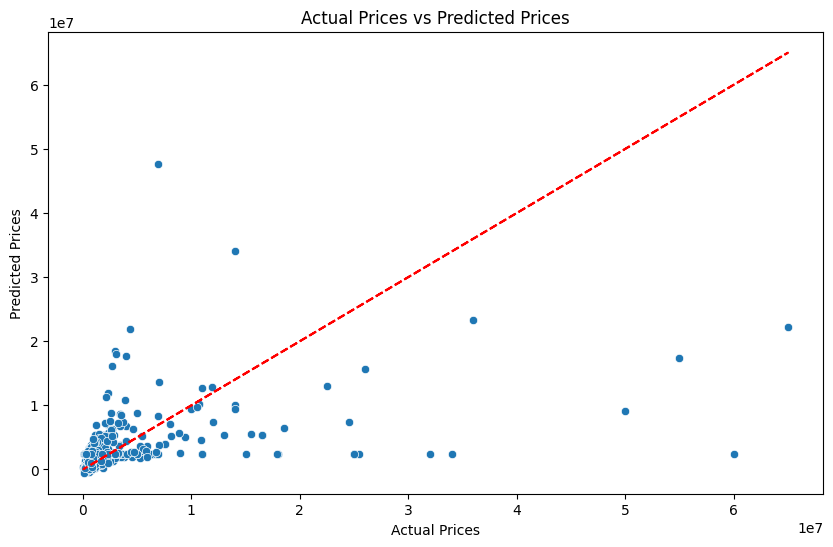

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the result
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.show()

In [ ]:
# 4. Effect of Location on House Prices: Determine how different local and administrative areas impact house prices.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# loaddata about local and admistrative areas
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
# show coloumn local and administrative areas
df.columns



Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
#effect on prices

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()



,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
# Data cleaning and preprocessing

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)



In [10]:
# 4. Price Analysis by Property Type: Determine the average price of different property types (e.g., Condo, House, Townhouse) in New York.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [12]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [14]:
# one hot encode the property type
df = pd.get_dummies(df, columns=['TYPE'])


In [16]:
# select the features(X) and target vector(y)
X = df.drop(columns=['PRICE'])
y = df['PRICE']

In [17]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# train a linear regressoin model
from sklearn.metrics import mean_squared_error, r2_score # Import necessary functions
model = LinearRegression()

# Convert relevant columns in X_train and X_test to float before fitting
X_train = X_train.select_dtypes(include=['number']) # Select only numerical columns
X_test = X_test.select_dtypes(include=['number'])   # Select only numerical columns

model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred) # Now you can use mean_squared_error
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 22108238713772.33
R-squared: 0.12250906649450721


In [24]:
# 5. Broker Comparison: Identify the top 5 brokers with the highest number of property listings and analyze their average listing prices.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [28]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [29]:
# 5. Broker Comparison: Identify the top 5 brokers with the highest number of property listings and analyze their average listing prices.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')

# top 5 brokers with the highest number of property listing
top_brokers = df['BROKERTITLE'].value_counts().head(5)  # Use the correct column name 'BROKERTITLE'

print(top_brokers)

BROKERTITLE
Brokered by COMPASS                              456
Brokered by Douglas Elliman - 575 Madison Ave    110
Brokered by Brown Harris Stevens                  93
Brokered by Corcoran East Side                    91
Brokered by RE MAX Edge                           79
Name: count, dtype: int64


In [30]:
# 6. Price Distribution by Locality: Analyze the distribution of house prices in different localities within New York.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [31]:
# analyze the distribution of house prices in diffrent localities within newyork
locality_prices = df.groupby('LOCALITY')['PRICE'].mean()

print(locality_prices)

LOCALITY
Bronx County       3.376565e+05
Brooklyn           1.426167e+06
Flatbush           6.500000e+05
Kings County       8.646435e+05
New York           3.190146e+06
New York County    2.579619e+06
Queens             5.173333e+05
Queens County      4.430085e+05
Richmond County    4.475819e+05
The Bronx          3.306000e+05
United States      1.327848e+06
Name: PRICE, dtype: float64


In [32]:
# 7. Correlation between Property Size and Price: Investigate the correlation between the square footage of properties and their prices.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()




,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [33]:
# Investigate the correlation between the square footage of properties and their prices.
correlation = df['PROPERTYSQFT'].corr(df['PRICE'])

print(correlation)

0.11088876850890153


In [34]:
# 8. Most Expensive Streets: Identify the top 10 streets with the highest average property prices.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [42]:
# Identify the top 10 streets with the highest average property prices.
average_pprt_prices = df.groupby('STREET_NAME')['PRICE'].mean()
top_10_streets = average_pprt_prices.sort_values(ascending=False).head(10)

print(top_10_streets)

STREET_NAME
East 22nd Street     1.699500e+07
New York             1.021293e+07
Central Park West    9.975000e+06
West 13th Street     7.750000e+06
John Street          5.799000e+06
Staten Island        5.427598e+06
East 74th Street     4.250000e+06
PECK SLIP            4.000000e+06
East 88th Street     3.995000e+06
West 56th Street     3.397500e+06
Name: PRICE, dtype: float64


In [43]:
# 9. Bedroom and Bathroom Influence on Price: Analyze how the number of bedrooms and bathrooms influences the price of properties.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [45]:
# Analyze how the number of bedrooms and bathrooms influences the price of properties.
bedroom_bathroom_price = df.groupby(['BEDS', 'BATH'])['PRICE'].mean()

print(bedroom_bathroom_price)

BEDS  BATH     
1     1.000000     4.626315e+05
      2.000000     1.112792e+06
      2.373861     2.110057e+06
2     1.000000     4.867920e+05
      2.000000     1.435088e+06
                       ...     
35    16.000000    4.380000e+06
36    16.000000    3.099000e+06
40    20.000000    5.980000e+06
42    43.000000    1.070000e+07
50    50.000000    1.100000e+07
Name: PRICE, Length: 126, dtype: float64


In [46]:
# 10. Geographical Price Variation: Visualize the geographical variation of house prices across New York using latitude and longitude data.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


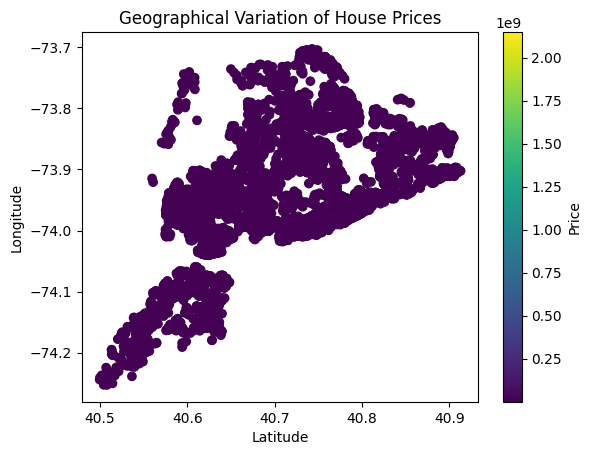

In [52]:
# Visualize the geographical variation of house prices across New York using latitude and longitude data.
plt.scatter(df['LATITUDE'], df['LONGITUDE'], c=df['PRICE'], cmap='viridis')
plt.colorbar(label='Price')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographical Variation of House Prices')
plt.plot()
plt.show()

In [53]:
# 11. Property Type and Size Distribution: Determine the distribution of property sizes (square footage) for different property types.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [54]:
# Determine the distribution of property sizes (square footage) for different property types.
property_type_sizes = df.groupby('TYPE')['PROPERTYSQFT'].mean()

print(property_type_sizes)

TYPE
Co-op for sale                1661.939812
Coming Soon                   2217.103931
Condo for sale                1574.625033
Condop for sale               2184.207862
Contingent                    1775.223442
For sale                      2116.483145
Foreclosure                   2331.229133
House for sale                2255.556856
Land for sale                 2159.019946
Mobile house for sale         2184.207862
Multi-family home for sale    3259.883946
Pending                       2070.169925
Townhouse for sale            3891.136747
Name: PROPERTYSQFT, dtype: float64


In [56]:
# 12. Price Trends in Different Administrative Areas: Examine price trends in different administrative areas (e.g., New York County, Richmond County).

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [61]:
# Examine price trends in different administrative areas (e.g., New York County, Richmond County).

# Check if 'COUNTY' column exists, if not, check for possible alternatives
print(df.columns)  # Print all column names to verify

# Use the correct column name 'ADMINISTRATIVE_AREA_LEVEL_2'
administrative_area_prices = df.groupby('ADMINISTRATIVE_AREA_LEVEL_2')['PRICE'].mean()

print(administrative_area_prices)

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
ADMINISTRATIVE_AREA_LEVEL_2
10002              3.125000e+06
10003              1.717500e+06
10017              3.720000e+05
10301              9.988000e+05
10303              5.990000e+05
10304              6.800000e+06
10306              1.272400e+06
10309              8.298880e+05
10310              7.419500e+05
10312              2.800000e+06
10463              3.690000e+05
10465              3.290000e+05
10466              6.890000e+05
10471              2.500000e+05
11214              1.353625e+06
11218              2.499000e+06
11229              1.022000e+06
11234              3.000000e+05
11237              2.200000e+06
11412              7.500000e+04
11414              1.990000e+05
11417            

In [63]:
# 13. Locality-wise Property Type Distribution: Analyze the distribution of different property types in various localities.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [64]:
# Analyze the distribution of different property types in various localities.
locality_property_type = df.groupby(['LOCALITY', 'TYPE']).size().unstack(fill_value=0)

print(locality_property_type)

TYPE             Co-op for sale  Coming Soon  Condo for sale  Condop for sale  \
LOCALITY                                                                        
Bronx County                141            0              31                0   
Brooklyn                      2            0               4                0   
Flatbush                      0            0               1                0   
Kings County                213            0             195                0   
New York                    128            2             143                1   
New York County             548            0             339                4   
Queens                        5            0               1                0   
Queens County               395            0             139                0   
Richmond County               5            0              36                0   
The Bronx                     5            0               0                0   
United States               

In [65]:
# 14. Top Localities for Luxury Properties: Identify localities with the highest concentration of high-priced (luxury) properties.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [66]:
# Identify localities with the highest concentration of high-priced (luxury) properties.
luxury_properties = df[df['PRICE'] > df['PRICE'].quantile(0.75)]
top_localities = luxury_properties['LOCALITY'].value_counts().head(10)

print(top_localities)




LOCALITY
New York           741
New York County    380
Kings County        57
United States       10
Queens County        4
Bronx County         2
Richmond County      1
Brooklyn             1
Name: count, dtype: int64


In [67]:
# 15. Price per Square Foot: Calculate and compare the price per square foot for properties in different localities and property types.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [68]:
# Calculate and compare the price per square foot for properties in different localities.
df['PRICE_PER_SQFT'] = df['PRICE'] / df['PROPERTYSQFT']
locality_price_per_sqft = df.groupby('LOCALITY')['PRICE_PER_SQFT'].mean()

print(locality_price_per_sqft)


LOCALITY
Bronx County        287.360381
Brooklyn            986.394485
Flatbush            619.047619
Kings County        660.699305
New York            857.070671
New York County    1220.484511
Queens              347.930397
Queens County       351.076800
Richmond County     377.130495
The Bronx           271.317693
United States       619.983002
Name: PRICE_PER_SQFT, dtype: float64


In [69]:
# Calculate and compare the price per square foot for properties in different property types.
property_type_price_per_sqft = df.groupby('TYPE')['PRICE_PER_SQFT'].mean()

print(property_type_price_per_sqft)


TYPE
Co-op for sale                 605.463668
Coming Soon                    525.233113
Condo for sale                1220.072386
Condop for sale                457.190919
Contingent                     503.383095
For sale                      1018.445469
Foreclosure                    459.935929
House for sale                 835.314814
Land for sale                  503.390034
Mobile house for sale          589.687466
Multi-family home for sale     599.004669
Pending                        606.007487
Townhouse for sale            1533.853853
Name: PRICE_PER_SQFT, dtype: float64


In [70]:
# 16. Broker Market Share: Determine the market share of brokers based on the number of property listings and total value of properties listed.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [71]:
# Determine the market share of brokers based on the number of property listings.
broker_listing_count = df['BROKERTITLE'].value_counts()
total_listings = broker_listing_count.sum()
broker_market_share = broker_listing_count / total_listings

print(broker_market_share)


BROKERTITLE
Brokered by COMPASS                              0.094980
Brokered by Douglas Elliman - 575 Madison Ave    0.022912
Brokered by Brown Harris Stevens                 0.019371
Brokered by Corcoran East Side                   0.018954
Brokered by RE MAX Edge                          0.016455
                                                   ...   
Brokered by Gerard R Desgranges                  0.000208
Brokered by Property Professional Realty         0.000208
Brokered by Mark Murphy Properties               0.000208
Brokered by S Sharf Realty Inc                   0.000208
Brokered by New York Way Real Estate Corp        0.000208
Name: count, Length: 1036, dtype: float64


In [72]:
# Determine the market share of brokers based on the number of total value of properties listed.
broker_total_value = df.groupby('BROKERTITLE')['PRICE'].sum()
total_value = broker_total_value.sum()
broker_market_share = broker_total_value / total_value

print(broker_market_share)

BROKERTITLE
Brokered by 1 Oak Real Estate Hub Inc     0.000106
Brokered by 5 Boro Realty Corp            0.001580
Brokered by A J Realty Of Queens Inc      0.000079
Brokered by A P Services Inc              0.000203
Brokered by AAA Young Shuen Realty Inc    0.000228
                                            ...   
Brokered by eXp Realty BKNY               0.000921
Brokered by eXp Realty NYC                0.000264
Brokered by qvtopservice                  0.000337
Built by Toll Brothers                    0.000439
NoBroker                                  0.003097
Name: PRICE, Length: 1036, dtype: float64


In [73]:
# 17. Property Price Segmentation: Segment properties into different price ranges and analyze the characteristics of each segment (e.g., number of bedrooms, bathrooms, property type).

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [75]:
# Property Price Segmentation into different price ranges.
df['PRICE_RANGE'] = pd.cut(df['PRICE'], bins=[0, 100000,])
df.head()



,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_RANGE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,NaN
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,NaN
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,NaN
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,"(0.0, 100000.0]"
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,NaN


In [76]:
# Property Price Segmentation analyze the characteristics of each segment (e.g., number of bedrooms, bathrooms, property type).
property_price_segment = df.groupby('PRICE_RANGE').agg({
    'BEDS': 'mean',
    'BATH': 'mean',
    'TYPE': 'value_counts'
})

print(property_price_segment)


                                           BEDS      BATH  TYPE
(0, 100000]                                2.05  1.206079   NaN
((0, 100000], Co-op for sale)               NaN       NaN  10.0
((0, 100000], Condo for sale)               NaN       NaN   3.0
((0, 100000], For sale)                     NaN       NaN   3.0
((0, 100000], Land for sale)                NaN       NaN   2.0
((0, 100000], Pending)                      NaN       NaN   2.0
((0, 100000], Coming Soon)                  NaN       NaN   0.0
((0, 100000], Condop for sale)              NaN       NaN   0.0
((0, 100000], Contingent)                   NaN       NaN   0.0
((0, 100000], Foreclosure)                  NaN       NaN   0.0
((0, 100000], House for sale)               NaN       NaN   0.0
((0, 100000], Mobile house for sale)        NaN       NaN   0.0
((0, 100000], Multi-family home for sale)   NaN       NaN   0.0
((0, 100000], Townhouse for sale)           NaN       NaN   0.0


<ipython-input-76-6c2d999b180b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  property_price_segment = df.groupby('PRICE_RANGE').agg({


In [77]:
# 18. Impact of Location on Price: Investigate how proximity to certain landmarks or popular areas (using geographical coordinates) impacts property prices.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [78]:
# Investigate how proximity to certain landmarks or popular areas (using geographical coordinates) impacts property prices.
property_prices = df.groupby('LATITUDE')['PRICE'].mean()

print(property_prices)


LATITUDE
40.499546    1280000.0
40.499798     659000.0
40.501623    1049000.0
40.501789     799500.0
40.501999     459000.0
               ...    
40.908622     889000.0
40.909252     385000.0
40.911070    1999000.0
40.911772     230000.0
40.912729     250000.0
Name: PRICE, Length: 4196, dtype: float64


In [79]:
# 19. Price Outliers: Identify outliers in the dataset where property prices deviate significantly from the average and analyze possible reasons (e.g., unique features, historical significance).

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [80]:
# Identify outliers in the dataset where property prices deviate significantly from the average and analyze possible reasons (e.g., unique features, historical significance).
average_price = df['PRICE'].mean()
std_deviation = df['PRICE'].std()
outliers = df[(df['PRICE'] < average_price - 2 * std_deviation) | (df['PRICE'] > average_price + 2 * std_deviation)]

print(outliers)


                           BROKERTITLE            TYPE       PRICE  BEDS  \
1                  Brokered by Serhant  Condo for sale   195000000     7   
304  Brokered by ANNE LOPA REAL ESTATE  House for sale  2147483647     7   

     BATH  PROPERTYSQFT                                            ADDRESS  \
1    10.0       17545.0  Central Park Tower Penthouse-217 W 57th New Yo...   
304   6.0       10000.0                                 6659-6675 Amboy Rd   

                  STATE                                       MAIN_ADDRESS  \
1    New York, NY 10019  Central Park Tower Penthouse-217 W 57th New Yo...   
304  New York, NY 10309               6659-6675 Amboy RdNew York, NY 10309   

    ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY    STREET_NAME  \
1                 United States  New York  New York County       New York   
304               United States  New York  Richmond County  Staten Island   

            LONG_NAME                            FORMATTED_ADDRESS   

###**These problem statements should help you explore various aspects of the dataset and derive meaningful insights.** ​​


